In [2]:
import tensorflow as tf
import numpy as np
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
#input_shape= x_train[0].shape
x_train=np.expand_dims(x_train,axis=3 )
input_shape= x_train[0].shape
x_test=np.expand_dims(x_test,axis=3 )

In [3]:

model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32,kernel_size=(3,3),input_shape=input_shape, activation = 'relu'),
tf.keras.layers.Conv2D(32,kernel_size=(3,3), activation = 'relu'),
tf.keras.layers.MaxPool2D(pool_size=(2,2)),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Conv2D(64,kernel_size=(3,3), activation = 'relu',padding='same' ),
tf.keras.layers.Conv2D(64,kernel_size=(3,3), activation = 'relu',padding='same' ),
tf.keras.layers.MaxPool2D(pool_size=(2,2)),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Conv2D(128,kernel_size=(3,3), activation = 'relu',padding='same' ),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Flatten(),
#tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.train.AdamOptimizer(0.0003),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])


W1011 17:17:07.174589  6028 deprecation.py:506] From C:\Users\Student\.conda\envs\neural\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [4]:
model.fit(x_train, y_train, epochs=1)


60000/60000 [==============================] - 535s 9ms/sample - loss: 0.2050 - acc: 0.9378


In [ ]:
model.layers[0].output

(1, 26, 26, 32)
num layer= 0 



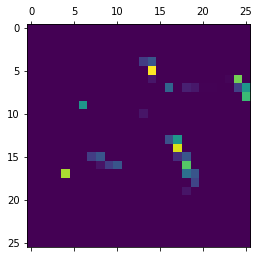

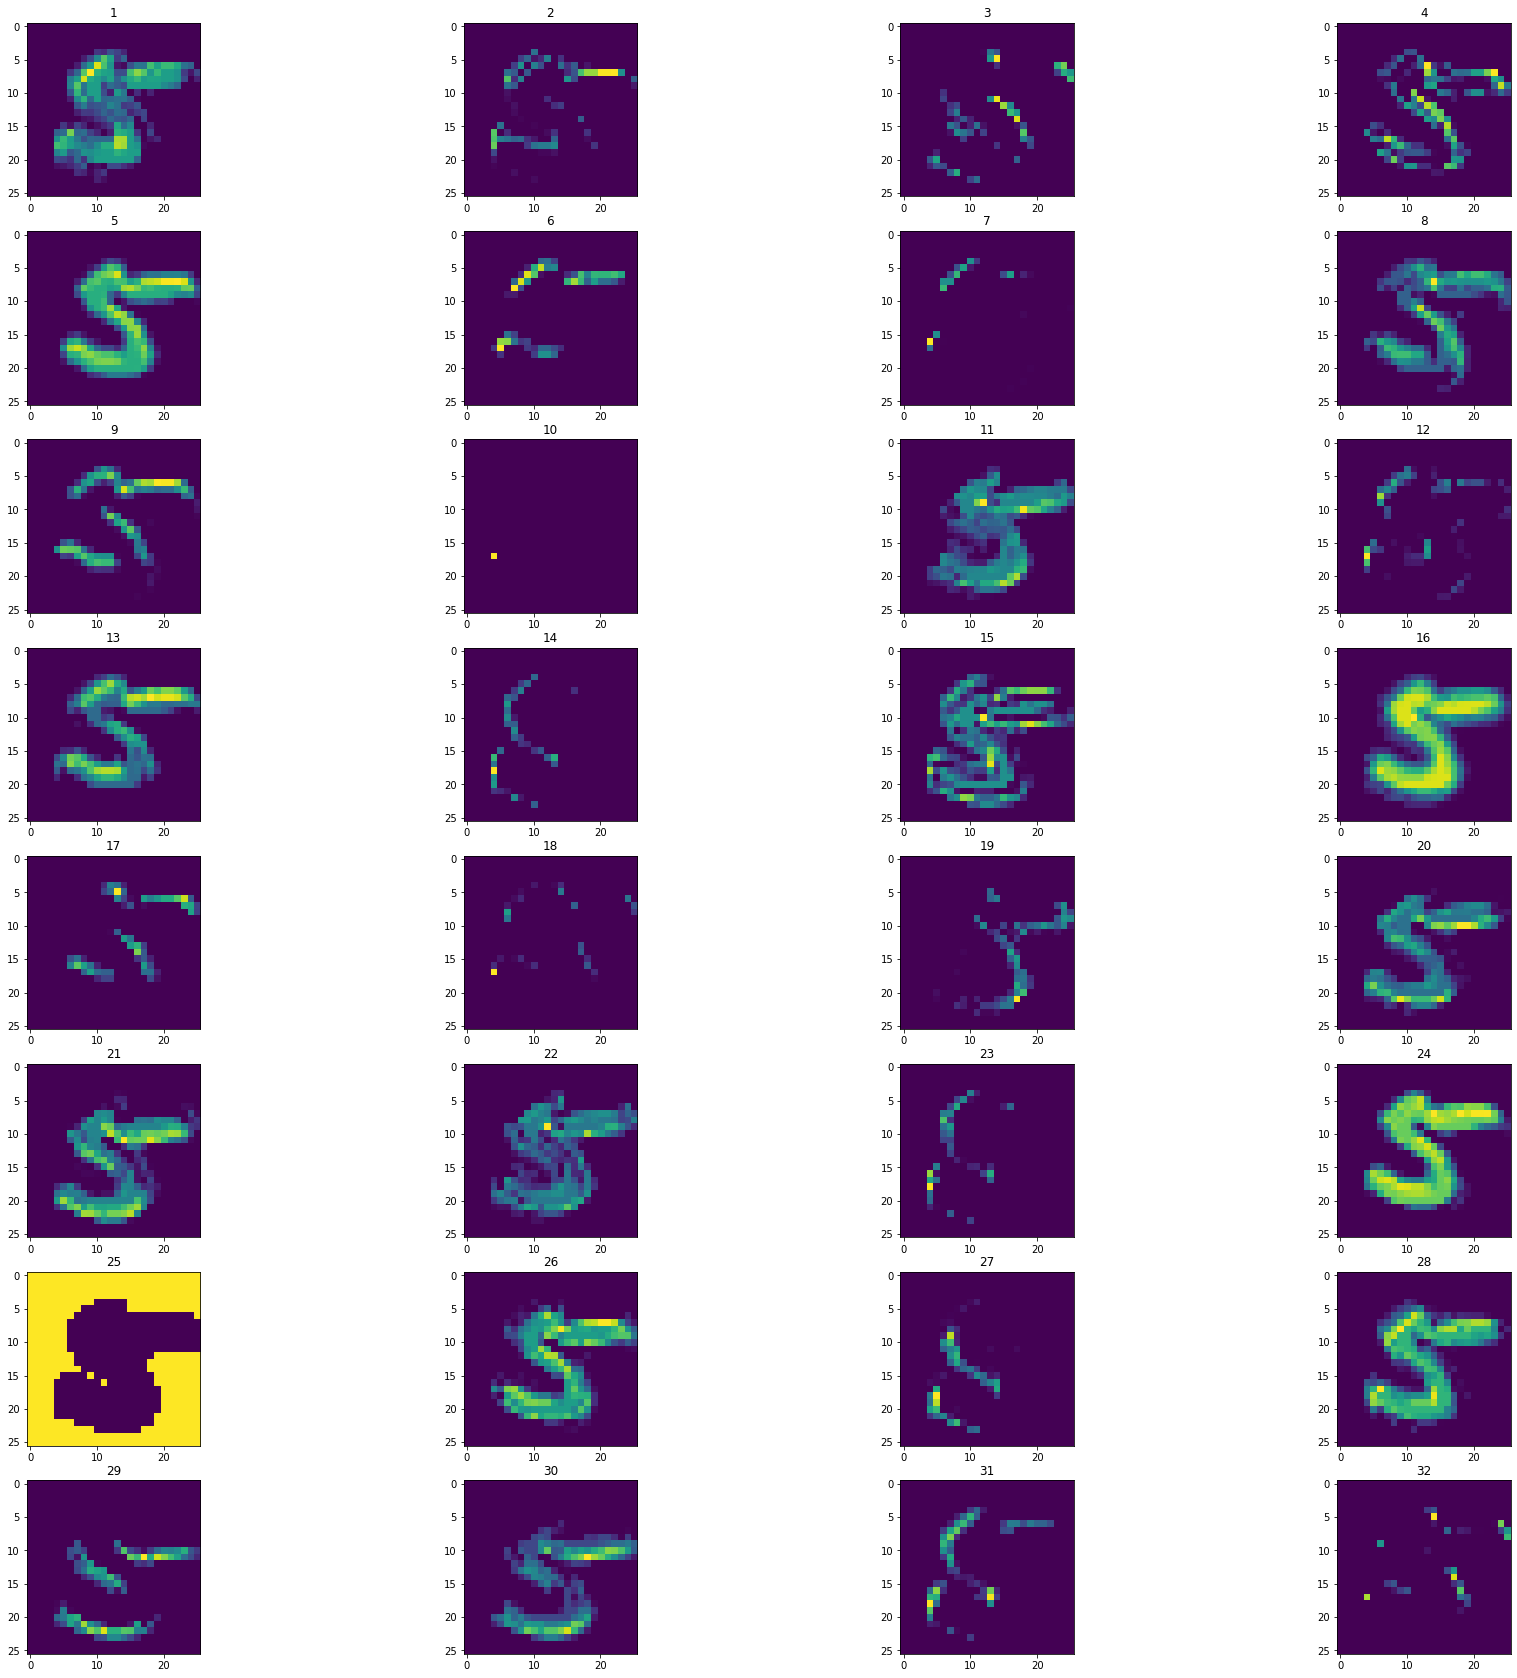

num layer= 1 



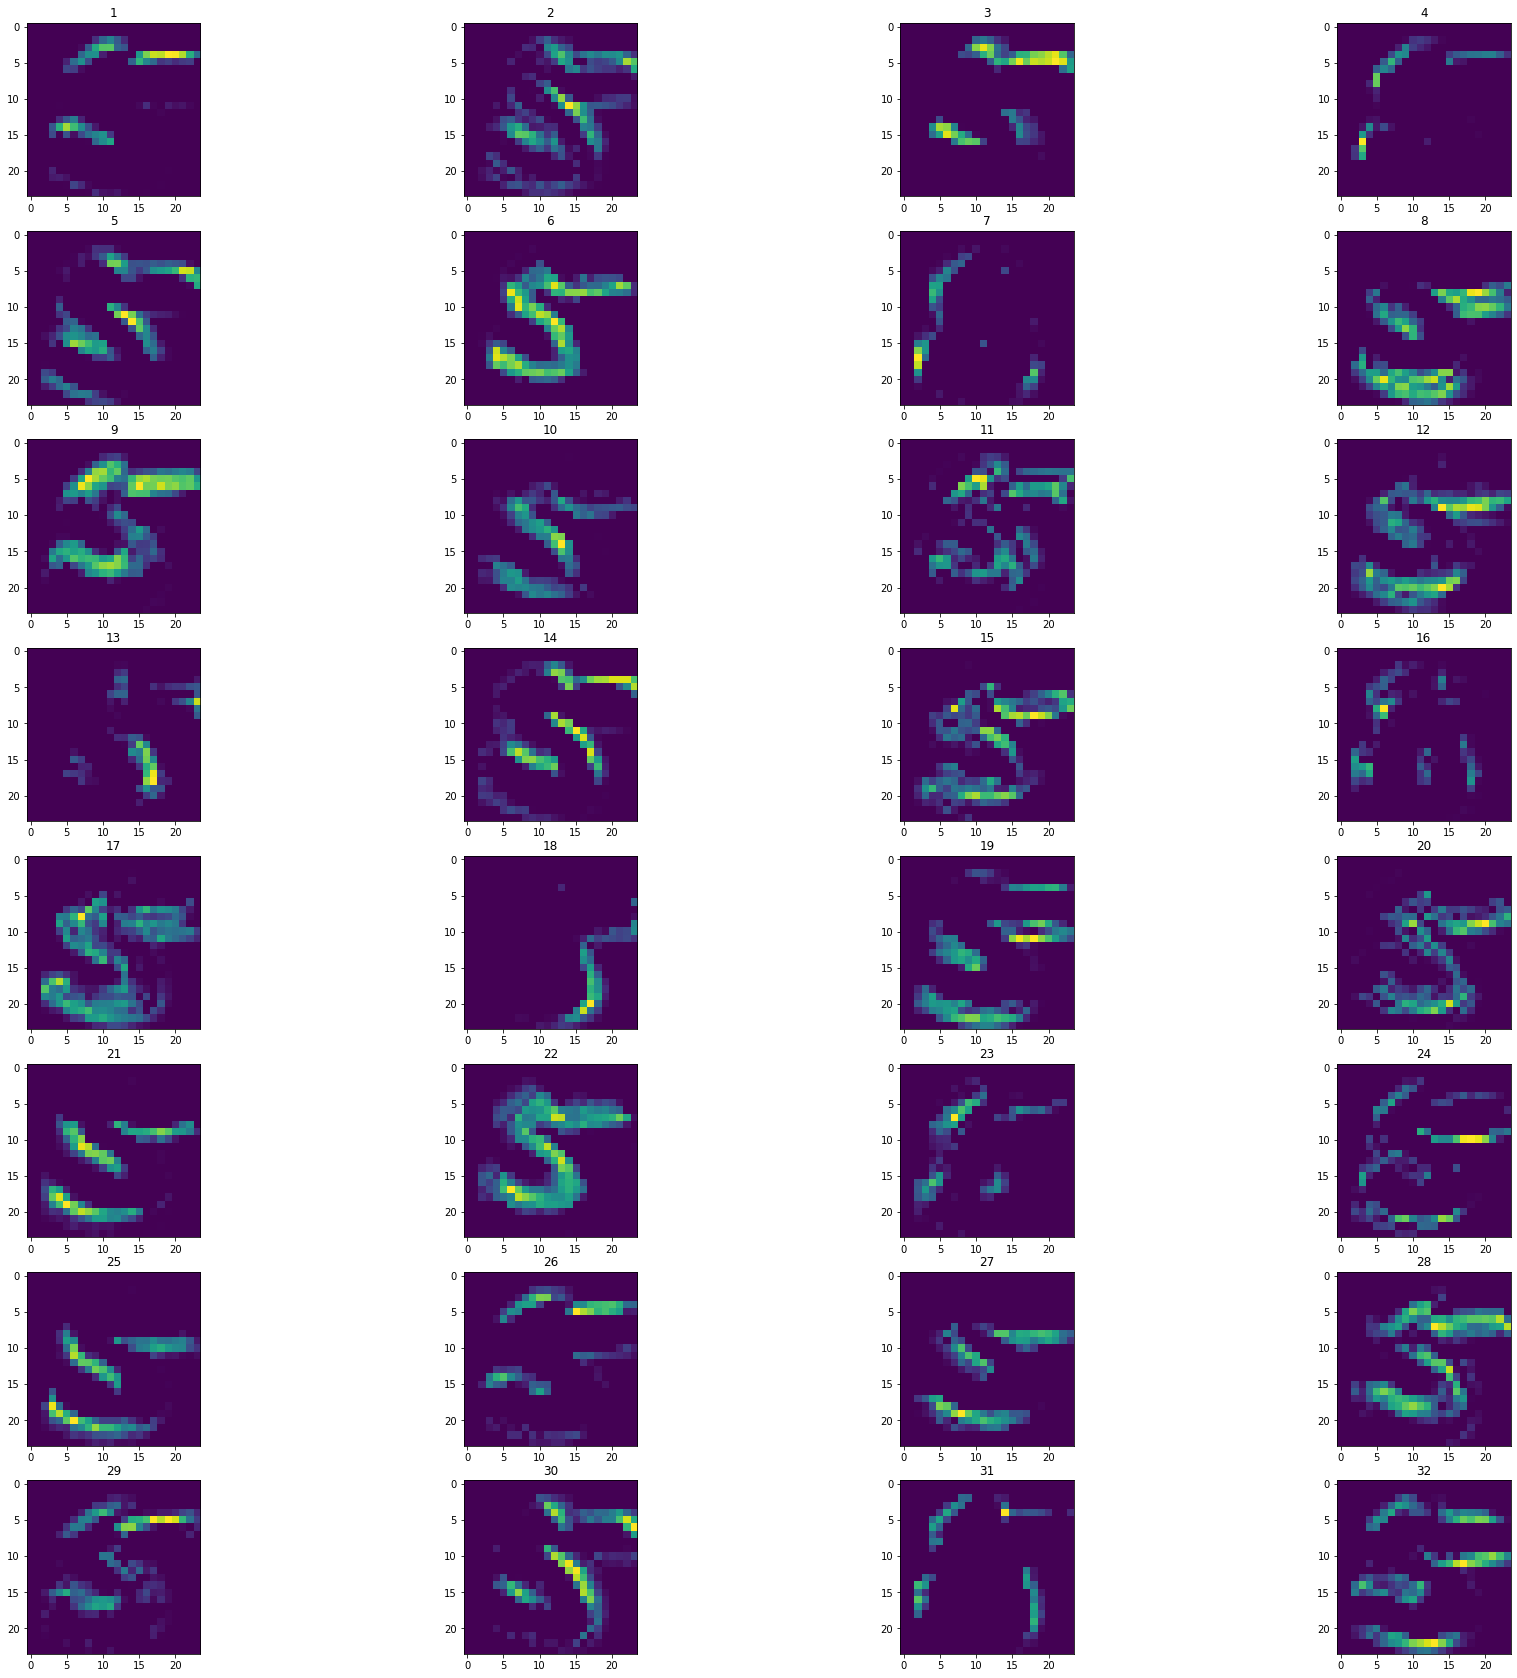

num layer= 2 



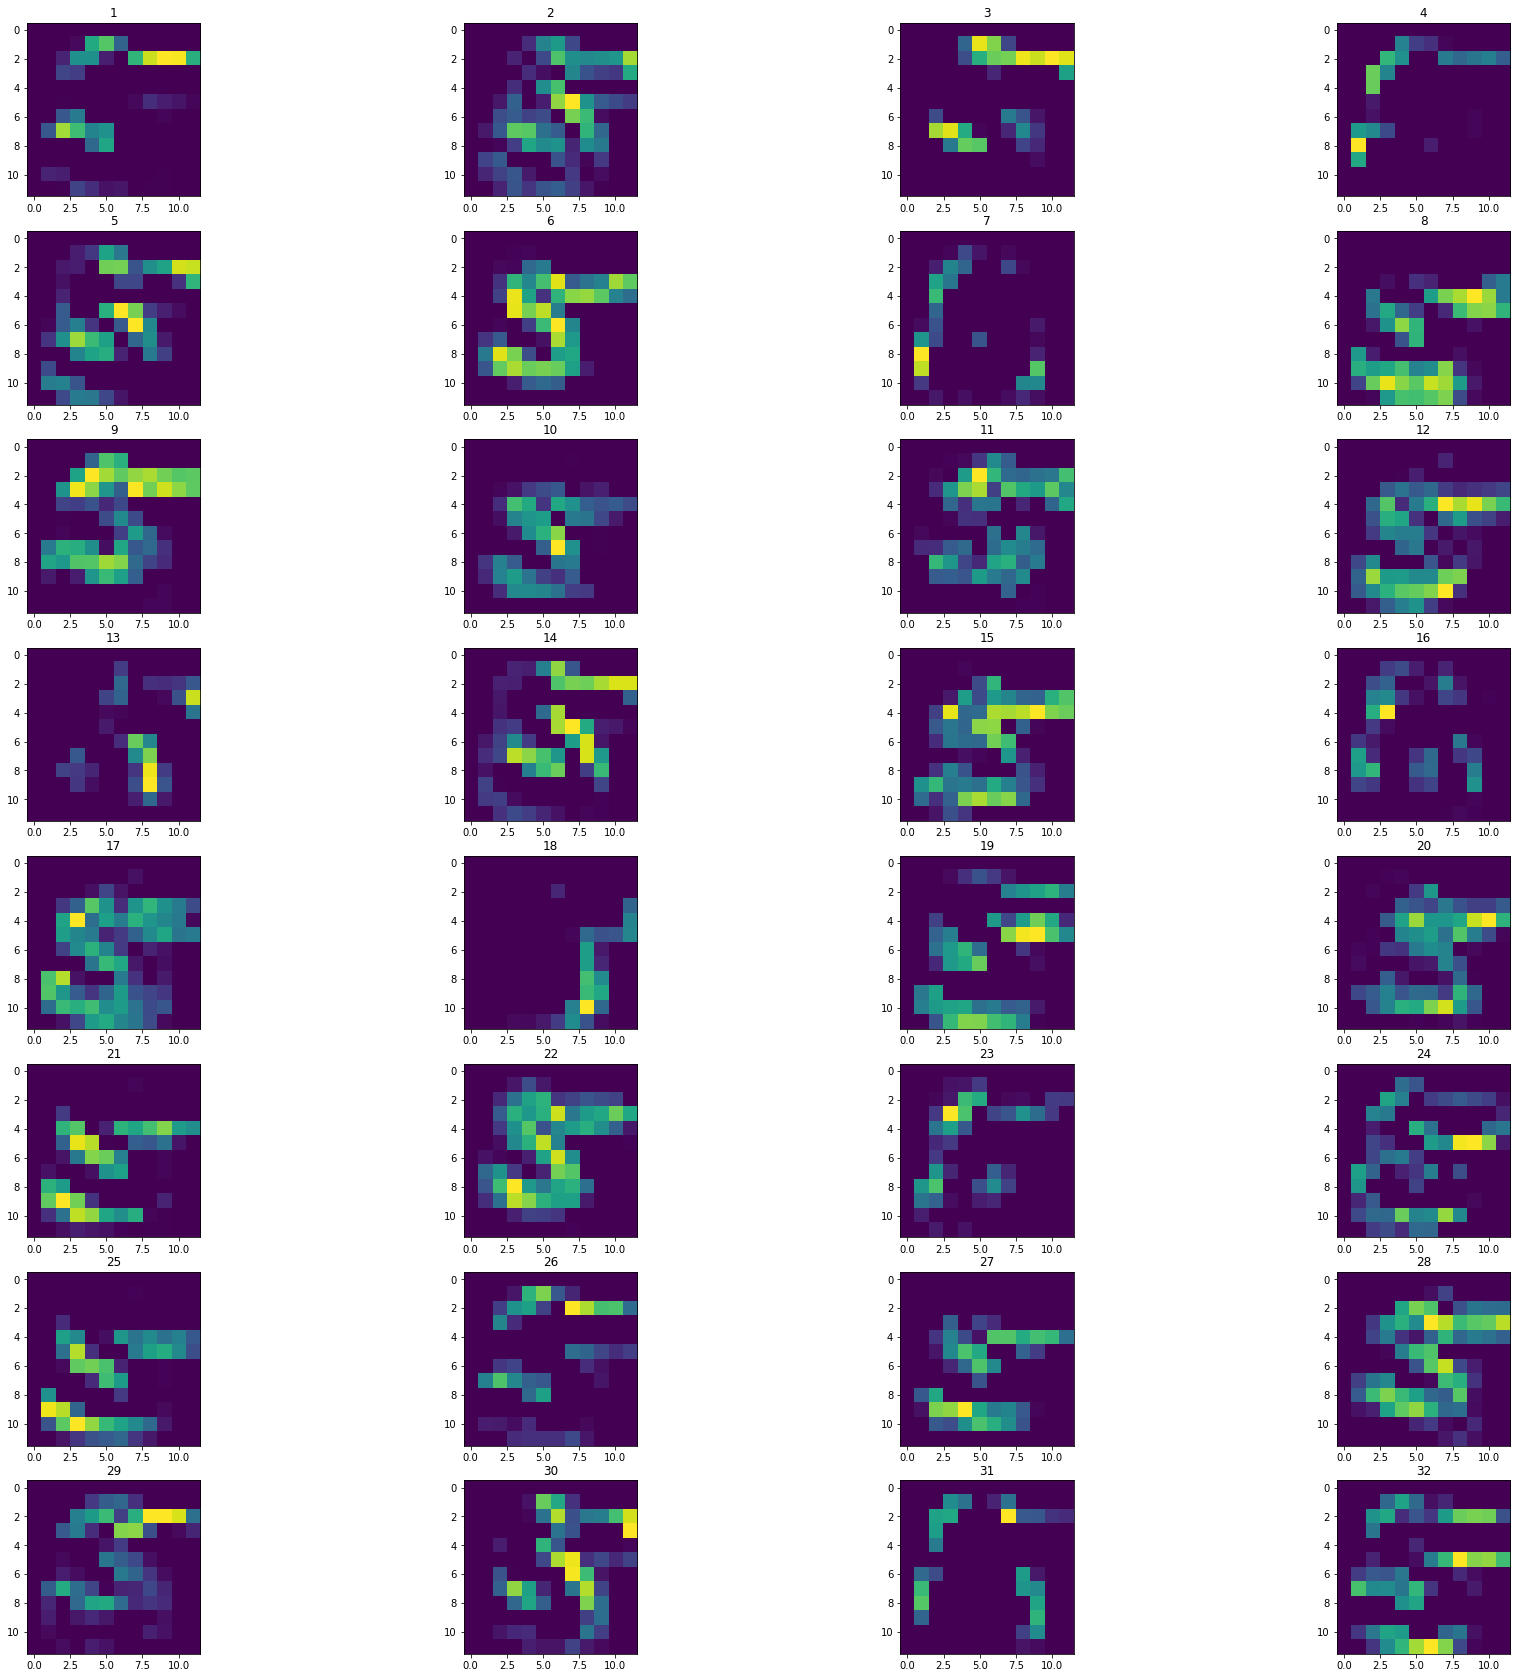

num layer= 3 



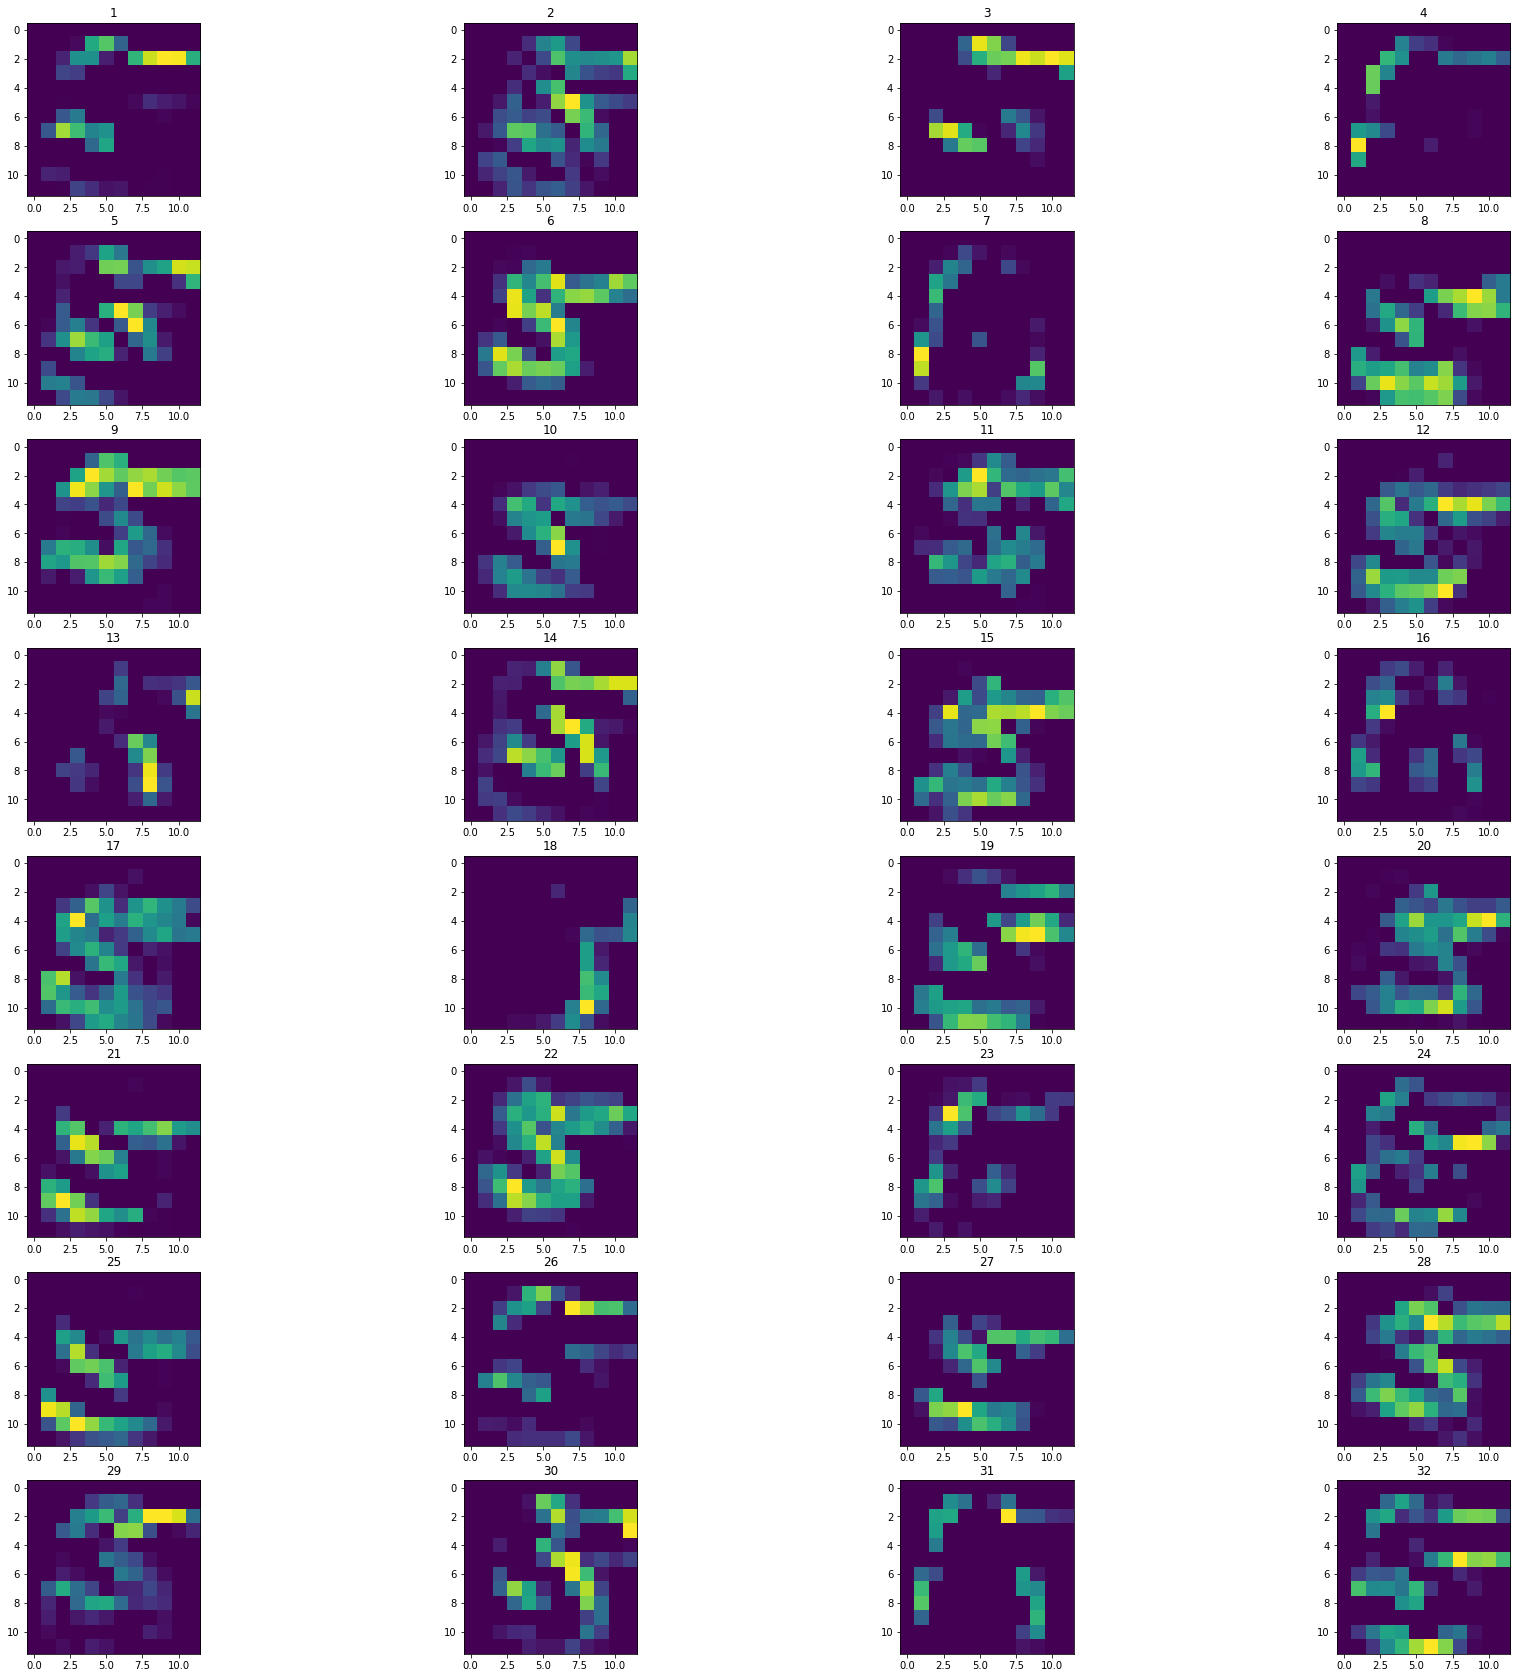

num layer= 4 



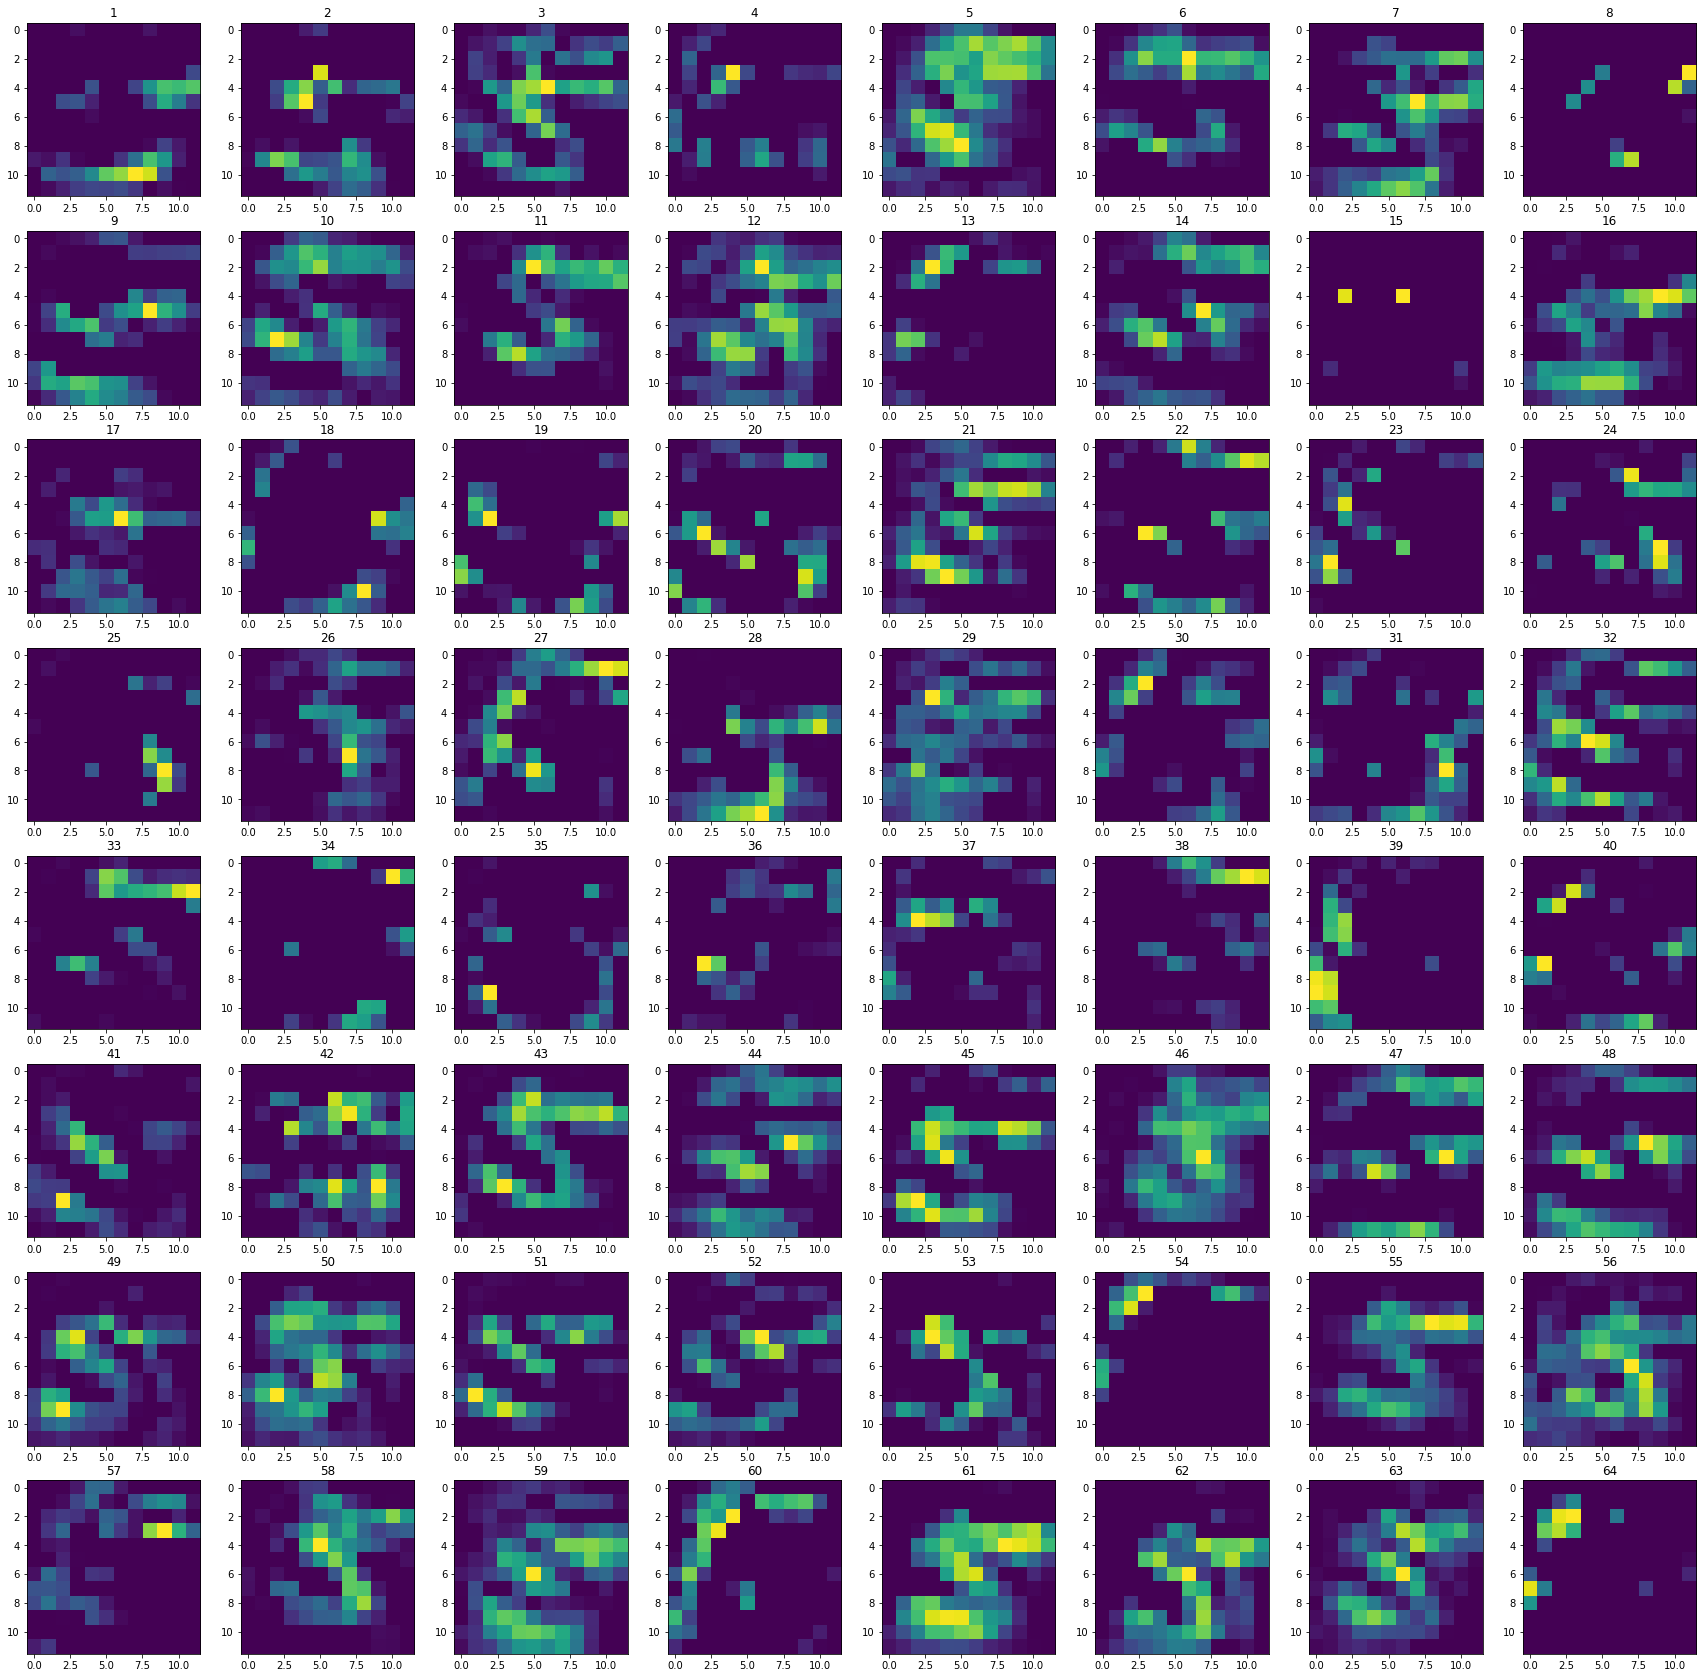

num layer= 5 



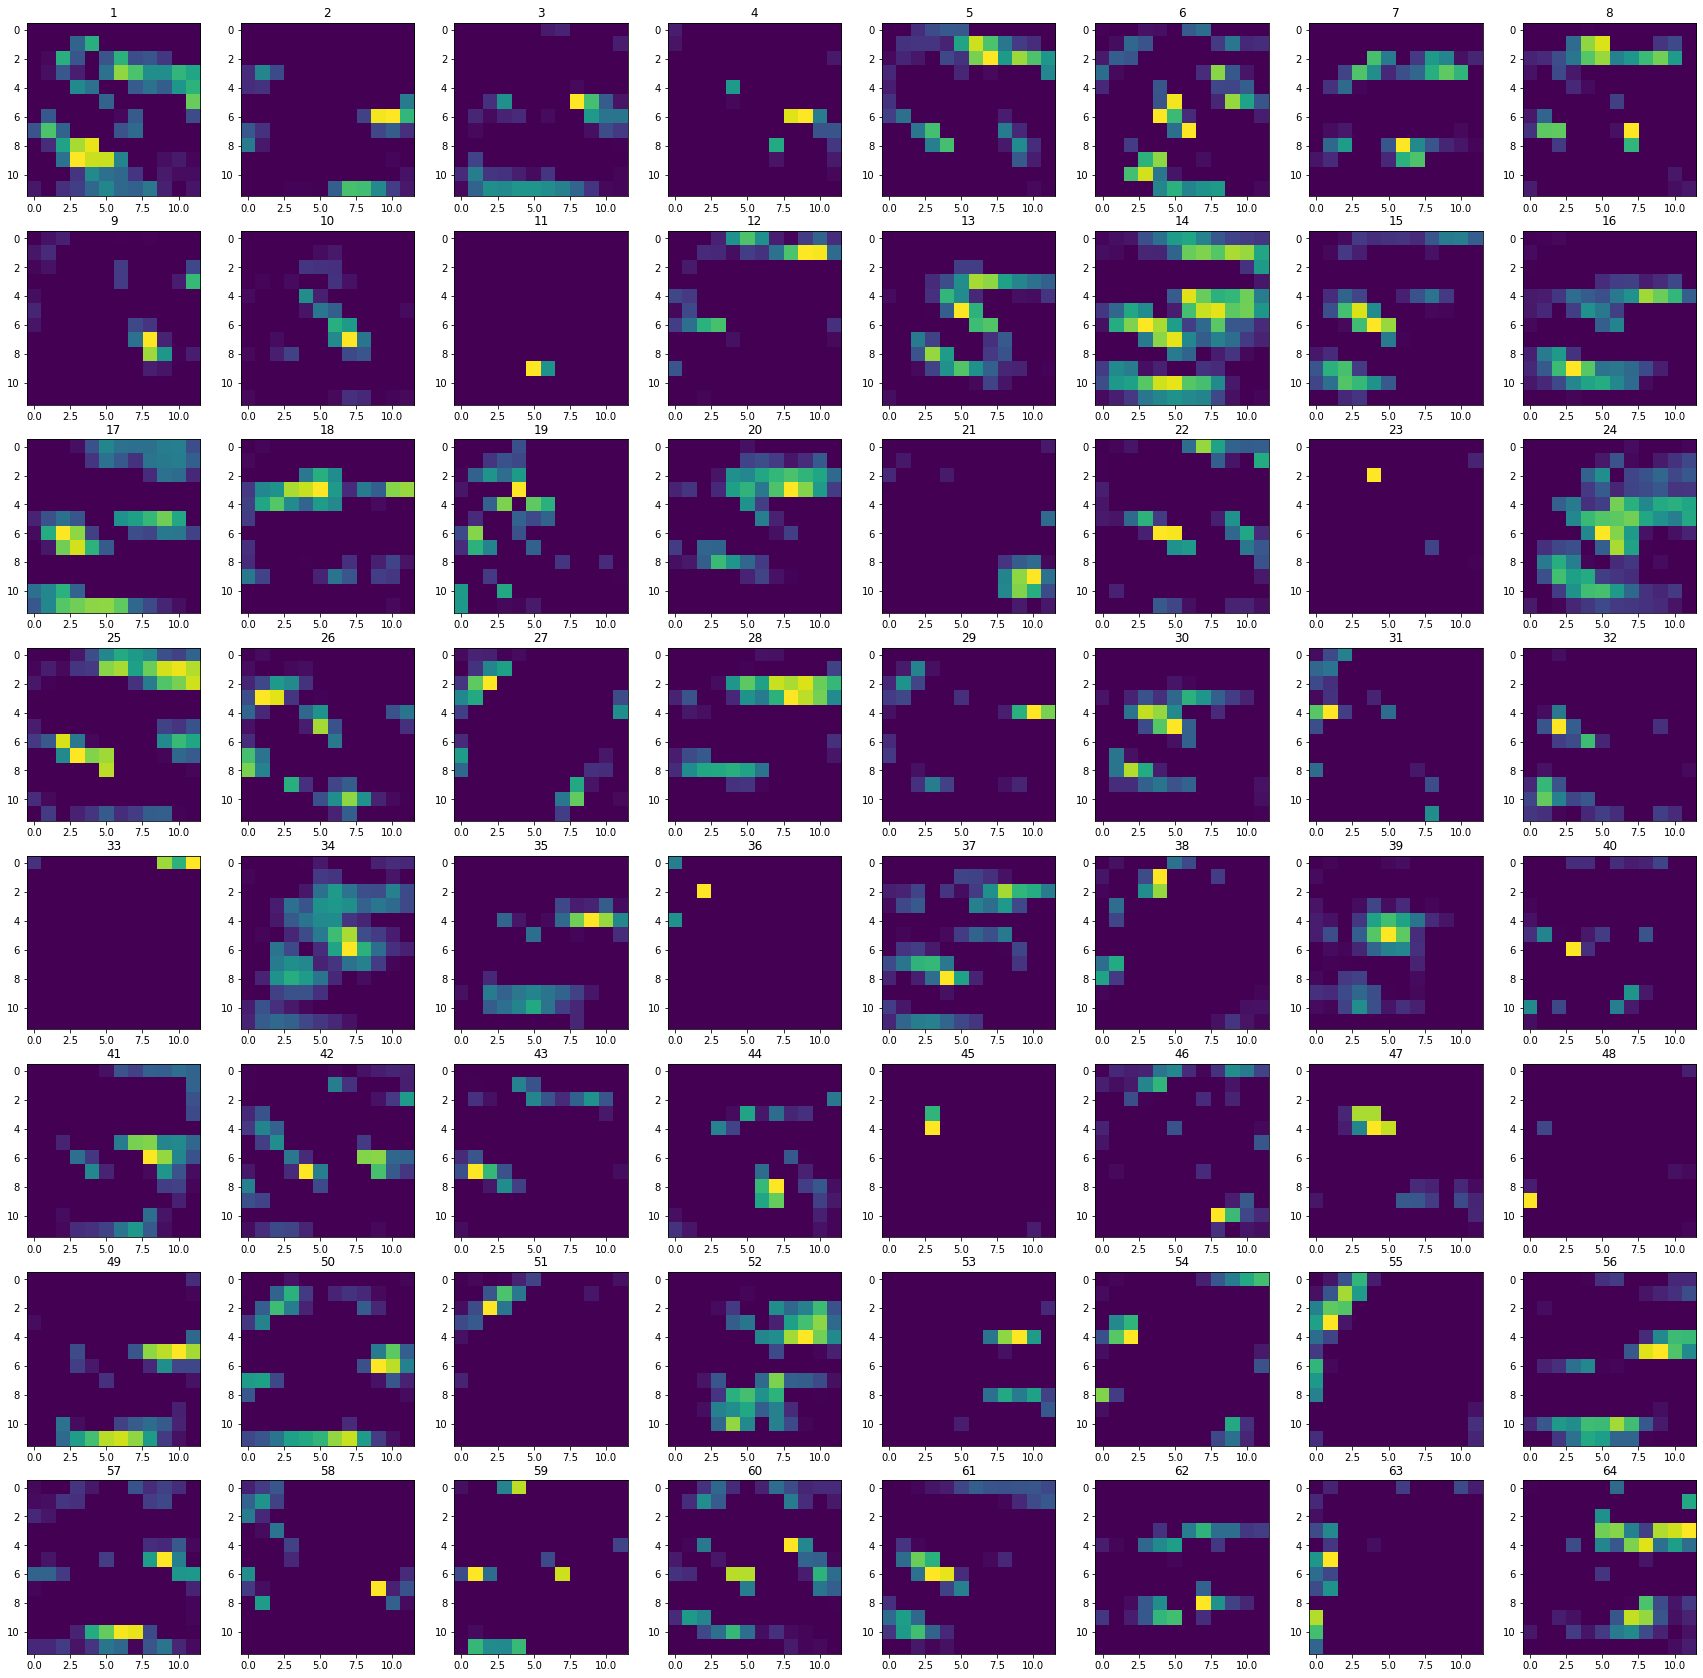

num layer= 6 



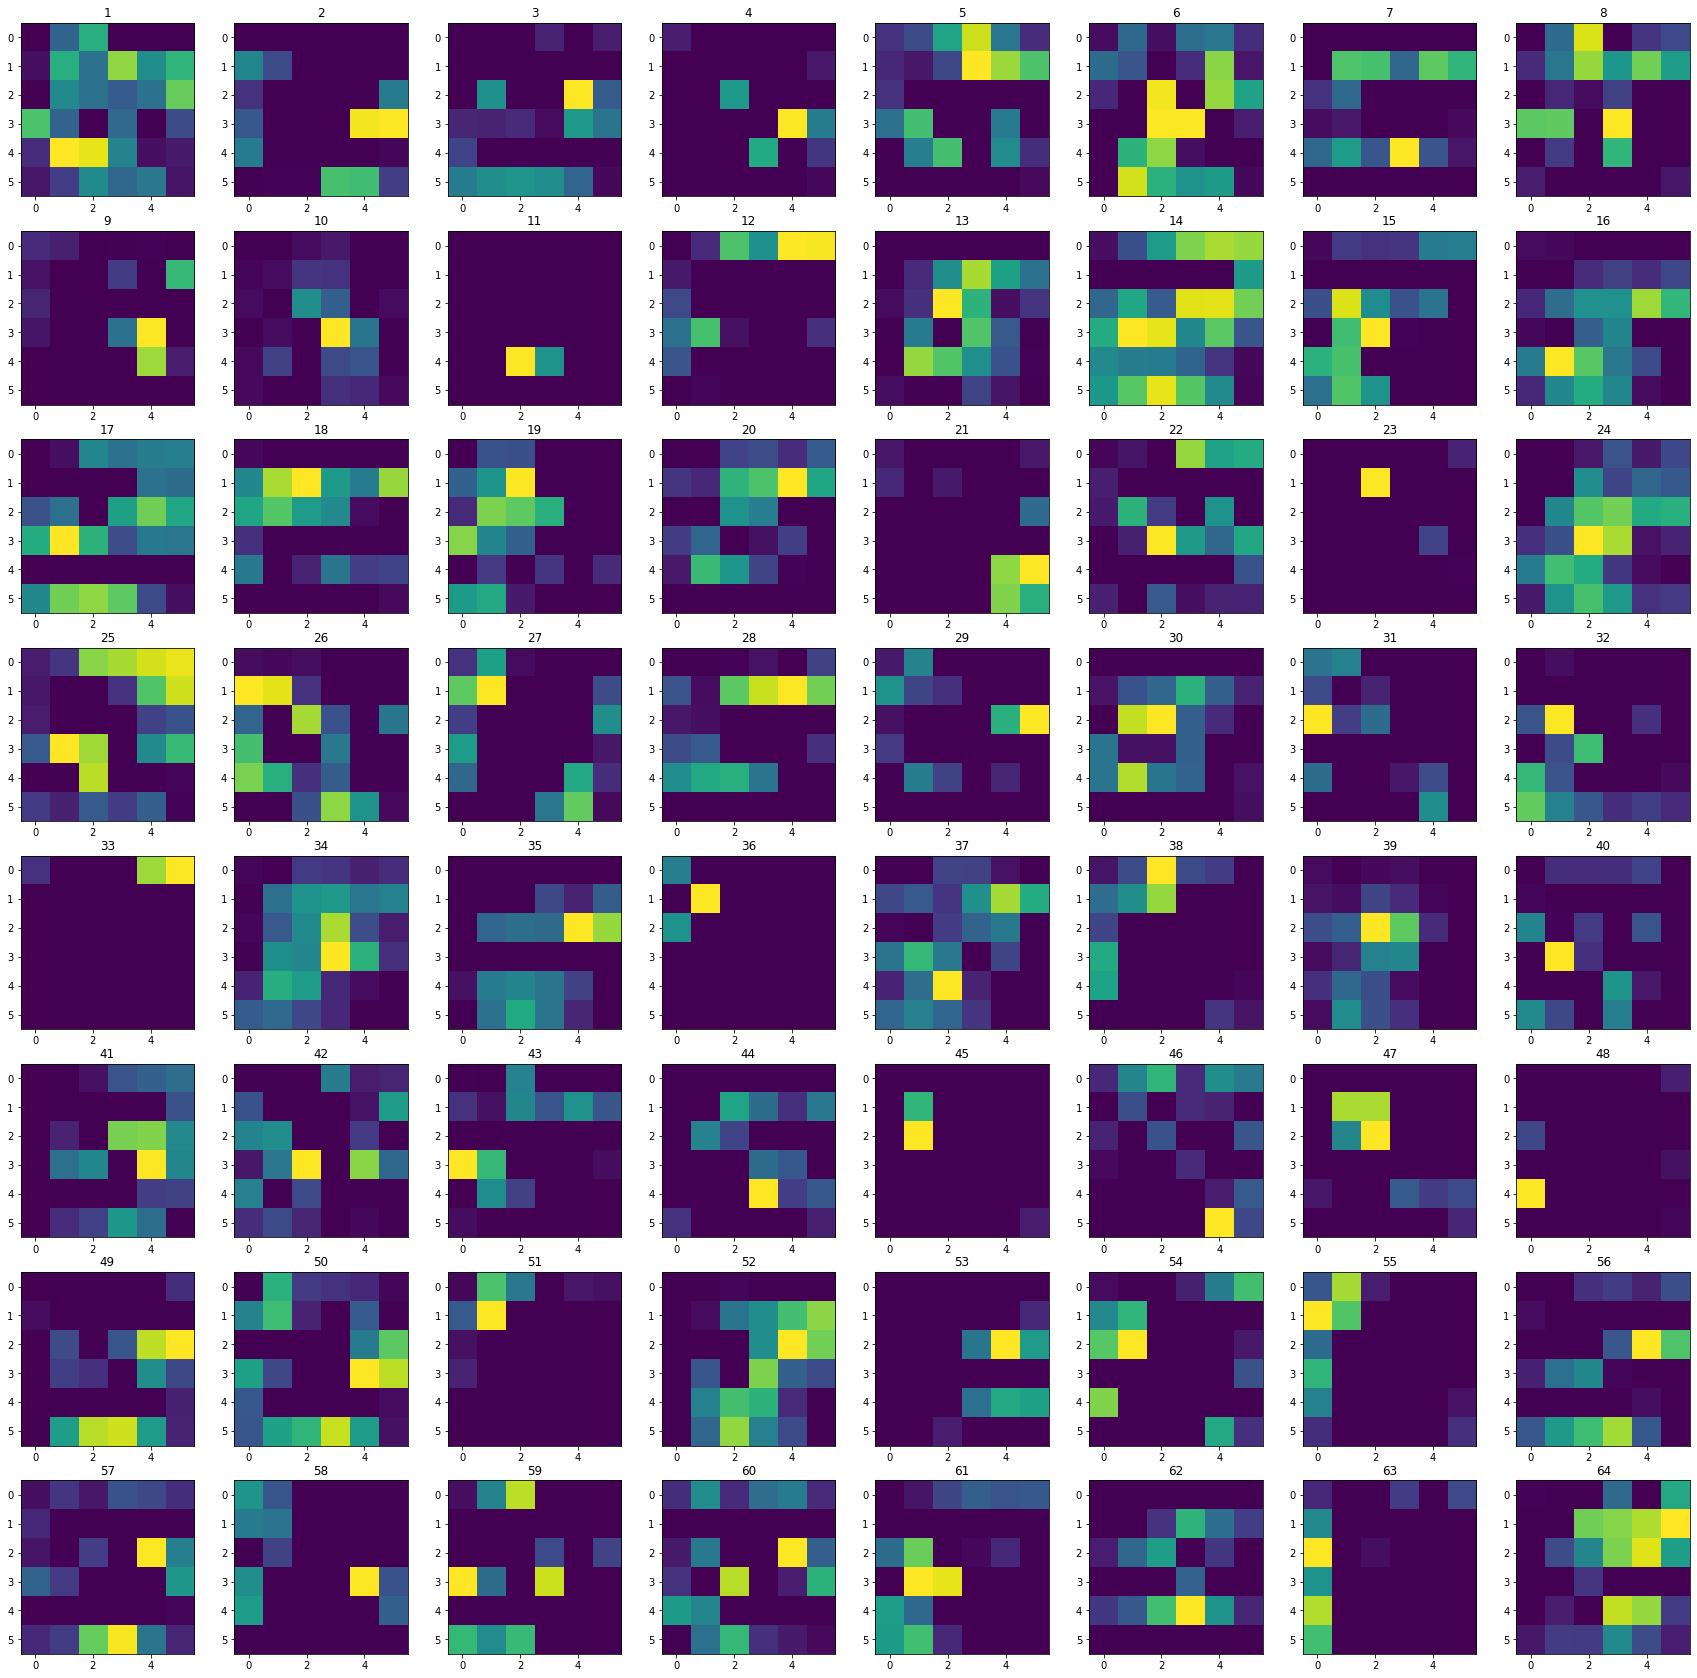

num layer= 7 



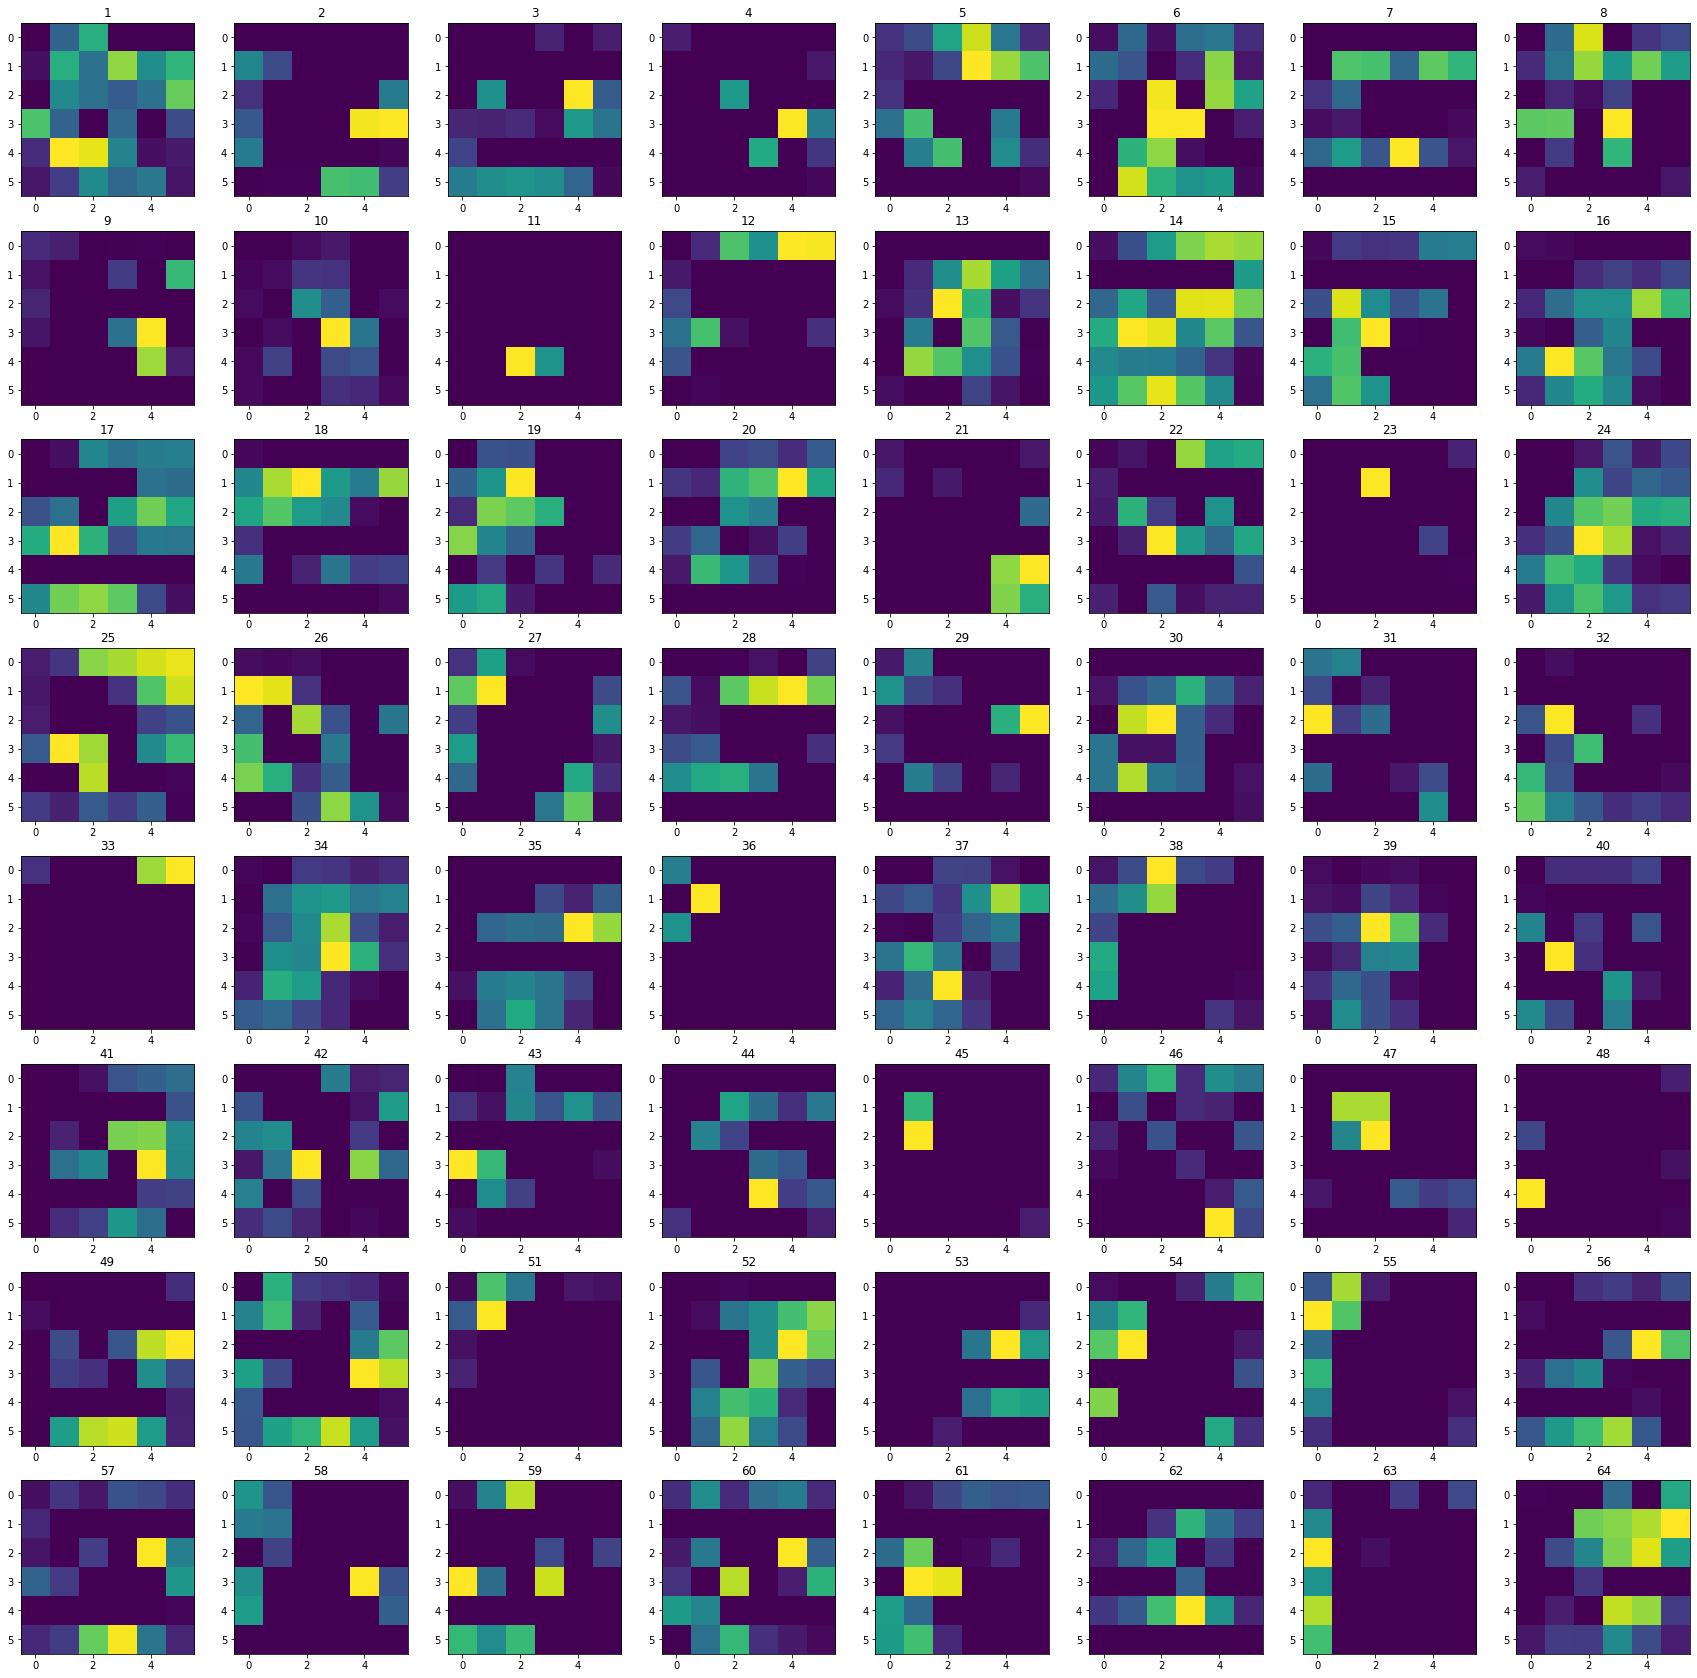

In [17]:
test_im = x_train[1245] 

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
activations=activation_model.predict(test_im.reshape(1,28,28,1)) 
first_layer_activation = activations[0]
print(first_layer_activation.shape) 
#first_layer_activation = activations[1] 
plt.matshow(first_layer_activation[0,:,:,31])
for j in range(0,8):
    fig=plt.figure(figsize=(30,30))
    first_layer_activation = activations[j]
    print('num layer=',j,'\n')


    for i in range(0,first_layer_activation.shape[3]):
        img = first_layer_activation[0,:,:,i]
        fig.add_subplot(8, first_layer_activation.shape[3]/8,i+1,title="{}".format(i+1))
        plt.imshow(img)
    plt.show()

In [5]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 30s 3ms/sample - loss: 0.0367 - acc: 0.9878


[0.0367466012025252, 0.9878]

In [6]:
import matplotlib.pyplot as plt

In [ ]:
x_train.shape 